# Instances features statistics

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import pickle
%load_ext autoreload
%autoreload 2

In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
# sys.path.insert(1, '../models')
sys.path.insert(0, '../')

from models.batch_env_rl import BatchEnvRL
from generator.op.generator_utils import get_generated_seeds

In [3]:
gen_seeds = get_generated_seeds()
#to consider only up to seed 4000 for all n_nodes
gen_seeds[20] = np.array([s for s in gen_seeds.get(20) if s<=4000]) 


## COMPUTING FOR THE FIRST 2000 SEEDS
for s in list(gen_seeds.keys()):
    gen_seeds[s] = np.array([s for s in gen_seeds.get(s) if s<=2000]) 

In [4]:
from models.features_utils import StaticFeatures

In [5]:
feature_list = StaticFeatures.POSSIBLE_FEATURES
feature_list

['x_coordinate',
 'y_coordinate',
 'tw_low',
 'tw_high',
 'prize',
 'tmax',
 'tw_delta',
 'tw_low_tmax_delta',
 'tw_high_tmax_delta',
 'prize_tw_delta_ratio',
 'prize_max_return_time_ratio',
 'tw_low_tmax_ratio',
 'tw_high_tmax_ratio']

In [6]:
n_nodes_list = list(gen_seeds.keys())
#COMPUTING ONLY FOR A SUBSET OF NODES
#n_nodes_list = range(10, 211, 50)

In [7]:
stats = dict()
for feat in feature_list:
    stats[feat] = dict()
    for n_nodes in n_nodes_list:
        stats[feat][n_nodes] = list()

for n_nodes in tqdm(n_nodes_list):
    for seed in tqdm(gen_seeds[n_nodes], leave=False):

        env = BatchEnvRL(n_envs=1, from_file=True, 
            x_path=f'../data/generated/n_nodes_{n_nodes}/instances/instance_nnodes_{n_nodes}_seed_{seed}.csv', 
            adj_path=f'../data/generated/n_nodes_{n_nodes}/adjs/adj-instance_nnodes_{n_nodes}_seed_{seed}.csv',
            noise_on=False)

        inst_features, _ = env.get_our_features(feature_list)
        for idx, feat in enumerate(feature_list):
            stats[feat][n_nodes].append(inst_features[0][:, idx])

  

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

../models/features_utils.py:117: RuntimeWarning: invalid value encountered in true_divide
  prize_max_return_time_ratio = self.inst_feat[:, pcf.PRIZE_IDX]\
../models/features_utils.py:109: RuntimeWarning: divide by zero encountered in true_divide
  prize_tw_delta_ratio = self.inst_feat[:, pcf.PRIZE_IDX] / (tw_delta)
../models/features_utils.py:117: RuntimeWarning: divide by zero encountered in true_divide
  prize_max_return_time_ratio = self.inst_feat[:, pcf.PRIZE_IDX]\


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/1999 [00:00<?, ?it/s]

  0%|          | 0/1993 [00:00<?, ?it/s]

  0%|          | 0/1994 [00:00<?, ?it/s]

In [8]:
stats.keys()

dict_keys(['x_coordinate', 'y_coordinate', 'tw_low', 'tw_high', 'prize', 'tmax', 'tw_delta', 'tw_low_tmax_delta', 'tw_high_tmax_delta', 'prize_tw_delta_ratio', 'prize_max_return_time_ratio', 'tw_low_tmax_ratio', 'tw_high_tmax_ratio'])

#### notice that depot has some outlier stats

In [9]:
np.mean(np.array(stats['prize'][10]), 0)

array([0.      , 0.547955, 0.53758 , 0.56101 , 0.547635, 0.54232 ,
       0.541635, 0.545365, 0.55195 , 0.53961 ])

In [10]:
[np.mean(np.array(stats['tw_delta'][s])[:,1:]/np.array(stats['tmax'][s])[:,1:]) for s in n_nodes_list]

[0.12019815046566085,
 0.06519769908874362,
 0.050734437359112115,
 0.042406307319046335,
 0.037308505815171734]

### removing depot when computing stats

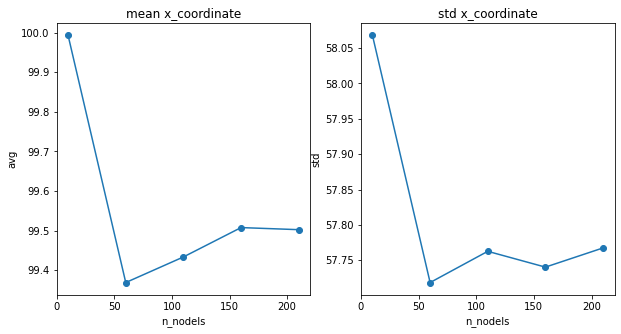

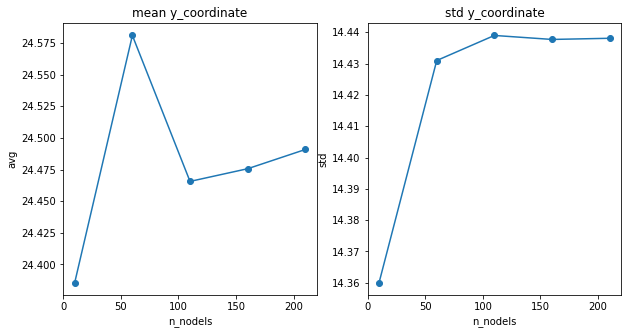

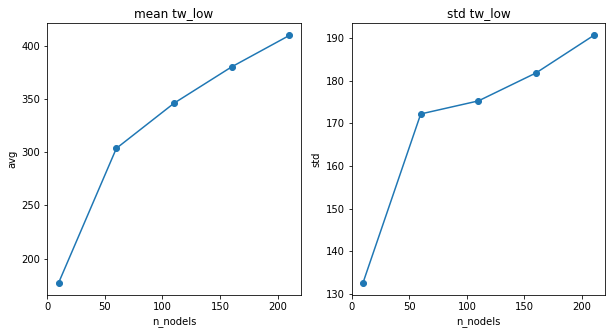

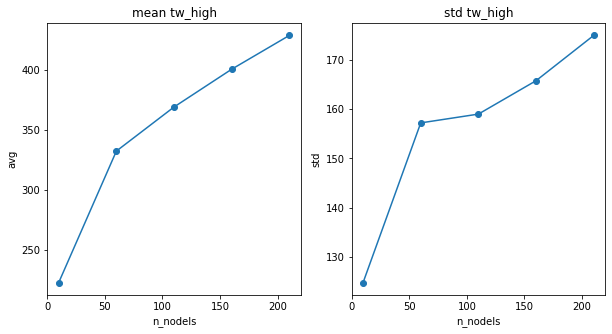

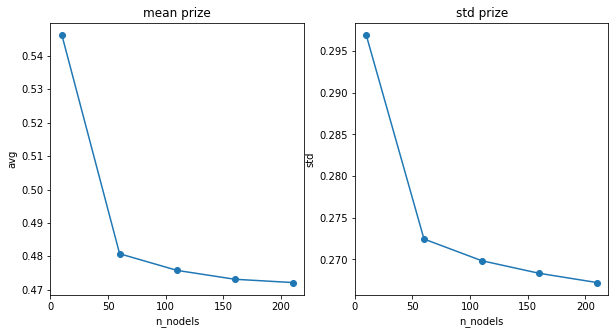

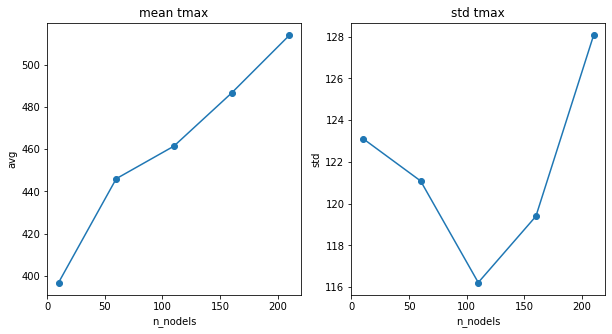

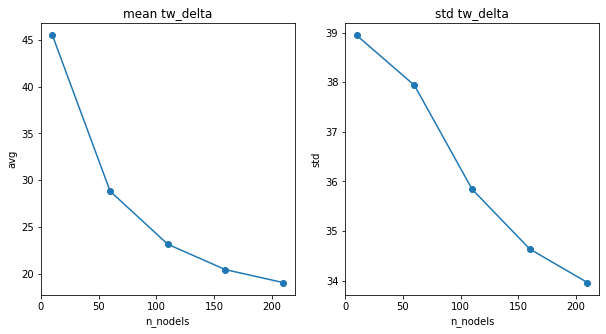

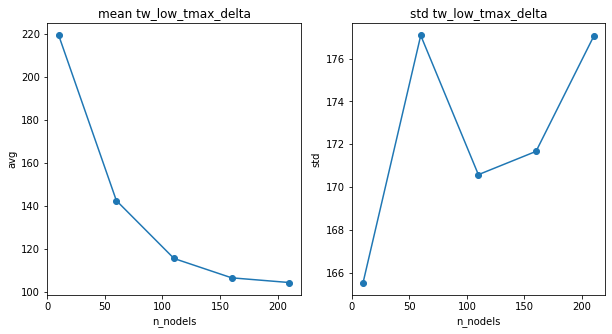

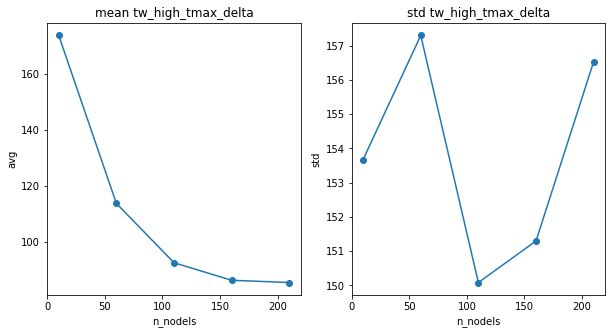

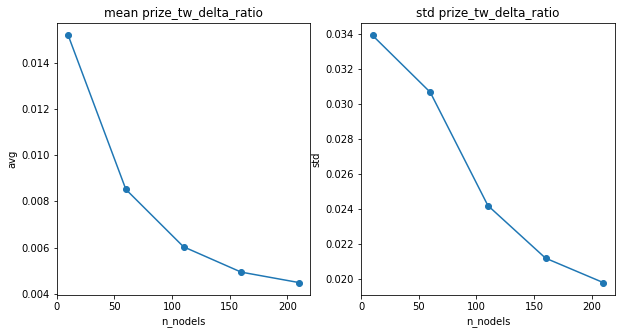

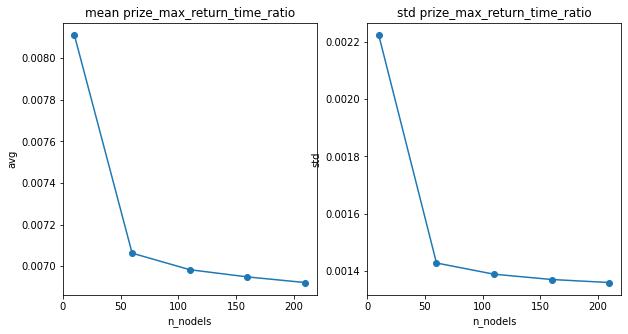

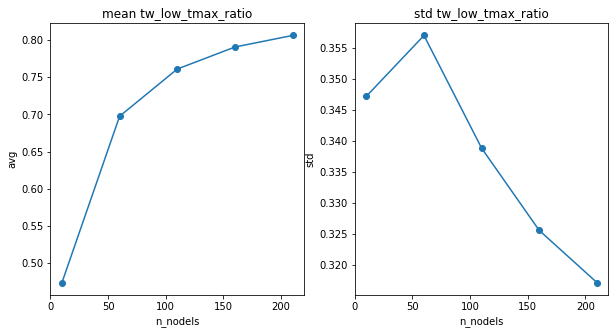

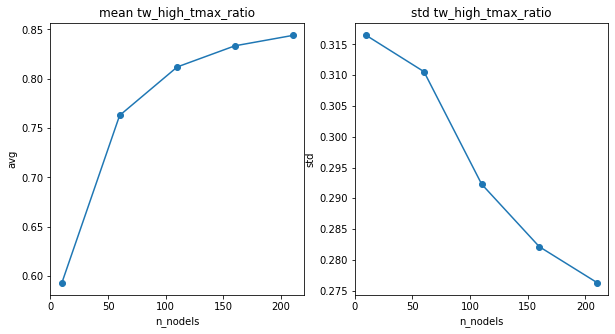

In [11]:
import matplotlib.pyplot as plt
for feat in feature_list:
    xx = n_nodes_list
    yy_mean = [np.mean(np.array(stats[feat][s])[:, 1:]) for s in n_nodes_list]
    yy_std = [np.std(np.array(stats[feat][s])[:, 1:]) for s in n_nodes_list]
    
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(xx, yy_mean, 'o-')
    plt.title(f'mean {feat}')
    plt.xlabel('n_nodels')
    plt.ylabel('avg')
    
    plt.subplot(122)
    plt.plot(xx, yy_std, 'o-')
    plt.title(f'std {feat}')
    plt.xlabel('n_nodels')
    plt.ylabel('std')
    plt.show()

In [12]:
normalization_stats = dict()
for feat in feature_list:
    normalization_stats[feat] = dict()
    for n_nodes in n_nodes_list:
        normalization_stats[feat][n_nodes] = dict()
        normalization_stats[feat][n_nodes]['mean'] = np.mean(np.array(stats[feat][n_nodes])[:, 1:])
        normalization_stats[feat][n_nodes]['std'] = np.std(np.array(stats[feat][n_nodes])[:, 1:])


In [13]:
normalization_stats

{'x_coordinate': {10: {'mean': 99.99283333333334, 'std': 58.06786454729787},
  60: {'mean': 99.36927966101695, 'std': 57.71857143471382},
  110: {'mean': 99.43381323689367, 'std': 57.76270176756726},
  160: {'mean': 99.50796656221303, 'std': 57.74036656047534},
  210: {'mean': 99.50269228738848, 'std': 57.76750073466687}},
 'y_coordinate': {10: {'mean': 24.38572222222222, 'std': 14.360046677831733},
  60: {'mean': 24.580915254237286, 'std': 14.43100811081863},
  110: {'mean': 24.465618130166, 'std': 14.439022382225916},
  160: {'mean': 24.47563326990378, 'std': 14.437746082313472},
  210: {'mean': 24.49081934799614, 'std': 14.438118016487719}},
 'tw_low': {10: {'mean': 177.56661111111111, 'std': 132.70271916607808},
  60: {'mean': 303.53793220338986, 'std': 172.1731755868388},
  110: {'mean': 345.8703388391443, 'std': 175.226261244229},
  160: {'mean': 379.99881345716295, 'std': 181.7759196376362},
  210: {'mean': 409.48716964289997, 'std': 190.5524575434034}},
 'tw_high': {10: {'mean'